In [1]:
#there are 83 red geysers in the original list, 51 of which can be found in MaNGA-HI data
file='joined_table.fits'

from astropy.io import fits
hdul = fits.open(file)
hdul.info()

hdu = hdul[1]
hdr0 = hdul[0].header 
hdr = hdul[1].header
data = hdu.data
#data.columns
#print((data.columns))

Filename: joined_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (8089,)   uint8   
  1  Joined        1 BinTableHDU    259   51R x 122C   [K, 32A, 32A, 9A, 32A, 32A, 32A, 32A, 32A, 32A, 32A, D, D, D, D, D, D, D, K, D, K, D, D, 53A, K, 32A, K, D, D, D, D, D, D, D, D, D, D, D, K, K, K, D, D, D, D, K, K, K, K, 32A, K, 19A, K, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, K, 6A, K, K, D, D, 7D, 7D, 7D, D, D, D, D, 7D, D, D, 7D, 7D, 7D, 7D, D, D, D, D, 7D, 7D, E, 79A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [1]:
#there are 65 red geysers
afile='allredgeys.fits'

ahdul = fits.open(afile)
ahdul.info()

ahdu = ahdul[1]
ahdr = ahdul[0].header 
ahdr = ahdul[1].header
adata = ahdu.data
#data.columns
#print((data.columns))

Filename: allredgeys.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (2474,)   uint8   
  1  Joined        1 BinTableHDU     68   65R x 28C   [11A, 9A, D, D, E, 79A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 9A]   


In [183]:
from astropy.io import ascii

tblgeysers1='uniqredgeys.txt'

tbl=ascii.read(tblgeysers1,delimiter='\s', names=('mangaid', 'plate', 'ifudsgn', 'objra', 'objdec')) 

tbl

mangaid,plate,ifudsgn,objra,objdec
str9,int64,int64,float64,float64
1-281439,8261,12701,182.356279647,46.5493574132
1-575668,8341,12702,189.397995312,44.801017021
1-145922,8149,12704,119.314391101,27.4960155494
1-218116,8149,12705,120.926748238,26.455443917
1-113520,7815,1901,317.502202242,11.5106477077
1-634825,7990,1901,264.455604594,57.1107078948
1-558242,8247,1901,137.06962848,42.1641416054
1-247449,8551,1901,232.885171748,45.6575956435
1-523238,8320,1901,206.144236809,23.7966101545


In [2]:
import numpy as np
mask=(data['logMHI'] > -999) & (data['Z']<0.05)
detx=data['NSA_ELPETRO_MASS'][mask]
#sel=data['logMHI']>-999
dety=(10**(data['logMHI'][mask]))/(detx)
print(len(dety))

11


In [3]:
mask2=(data['LOGHILIM200KMS'] > -999) & (data['Z']<0.05)
nondetx=data['NSA_ELPETRO_MASS'][mask2]
nondety=(10**(data['LOGHILIM200KMS'][mask2]))/(nondetx)
print(len(nondety))

40


In [77]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(detx, dety, label='detections', color='red', marker='x')
plt.scatter(nondetx, nondety,label='non-detections', color='green', marker='o' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log $M_* [M_o]$")
plt.ylabel("log $M_{HI}/M_*$")
plt.legend(loc='lower left')
plt.savefig('Red_Geyser_Mass_plot.png')
plt.title("Red Geyser $M_{HI}/M_*$ vs $M_*$")

Text(0.5, 1, 'Red Geyser $M_{HI}/M_*$ vs $M_*$')

In [4]:
#drphi-control is drpall + mangahi without red geyser sample
drphi = 'drphi.fits'
hdul1 = fits.open(drphi)
data1 = hdul1[1].data

#hdul1.info()

hdu = hdul1[1]
hdr0 = hdul1[0].header 
hdr = hdul1[1].header
data1.columns
print(len(data1['MANGAID_1']))

3699


In [5]:
'''
Each galaxy has 7 entries, corresponding 
to FUV, NUV, u, g, r, i, z magnitudes. E.g.,
'''
#print(data1['nsa_elpetro_absmag'][0])
'''So to get an NUV-r color (for example) for all galaxies:'''
NUV_r = data1['NSA_ELPETRO_ABSMAG'][:,1] - data1['NSA_ELPETRO_ABSMAG'][:,4]
NUV_r2=NUV_r>5
print(len(NUV_r))

3699


In [6]:
from astropy.table import Column, Table, vstack
bb = Column(NUV_r, name='NUV_r')
bb1=np.array(bb)
print(len(bb1))
with fits.open('drphi.fits') as hdul2:
    orig_table = hdul2[1].data
    orig_cols = orig_table.columns
    
new_cols = fits.ColDefs([
    fits.Column(array=bb1, name='NUV_r', format='D')])
hdu2 = fits.BinTableHDU.from_columns(orig_cols + new_cols)
#hdu2.writeto('newtable.fits')

3699


In [7]:
#drpall + mangahi with additional NUV_r column, no red geysers
complete = 'newtable2.fits'
hdul3 = fits.open(complete)
data2 = hdul3[1].data

#hdul3.info()

hdu3 = hdul3[1]
hdr01 = hdul3[0].header 
hdr11 = hdul3[1].header
#data2.columns
print(len(data2['plateifu_1_2']))

3648


In [8]:
#mask complete table to hide NUV_r < 5 and z > 0.05
mask3= (data2['NUV_r'] > 5) & (data2['nsa_elpetro_mass_2'] > 1) & (data2['Z_2'] < 0.05)#get rid of any 0 entries for mass
datas=data2[mask3]
print('There are',len(datas['nsa_elpetro_mass_2']),'galaxies in the drpall file with NUV-r > 5 and z < 0.05)')
#print('There are 34 galaxies in drpall file that have z > 0.05, for a total of 827 with NUV-r > 5.')

There are 749 galaxies in the drpall file with NUV-r > 5 and z < 0.05)


## I think ideally, I should've removed the red geyser sample from datas right here, before looking for control sample.

In [9]:
from astropy.table import Table
control_inds = np.array([]) #we'll save the indices of your control galaxes here
dm=0.1
for mass in np.log10(data['nsa_elpetro_mass']):
    #find the indices of galaxies which satisfy your criteria
    sel_control = np.where((np.log10(datas['nsa_elpetro_mass_2']) > (mass-0.1)) & (np.log10(datas['nsa_elpetro_mass_2']) < (mass+0.1)))
    #(you could add NUV-r > 5 reqiurement as well here )
    sel_control = sel_control[0]
    control_inds=np.concatenate([control_inds,sel_control])


res=[]
[res.append(x) for x in control_inds if x not in res] #getting rid of redundancies in indices

hmm=np.array(res) #turn list into array
print('The indices of the control galaxies:', len(res),'. I don"t know if the fact that this output is 50 less than 749 is a coincidence or not.')

The indices of the control galaxies: 699 . I don"t know if the fact that this output is 50 less than 749 is a coincidence or not.


In [10]:
t=Table(datas) #attempting to apply index slicing
t.add_index('nsa_elpetro_mass_2')
res2=list(map(int, res))
control=t[res2]

print(control)
control.write('controlll-take-22.fits', overwrite=True) #export this control table that still has some red geysers in it
cntrl = 'controlll-take-22.fits'
hdul6 = fits.open(cntrl)
data6 = hdul6[1].data

hdu6 = hdul6[1]
hdr6 = hdul6[0].header 
hdr6 = hdul6[1].header

          plateifu_1_2           MANGAID_1_2 ...      BL           NUV_r       
-------------------------------- ----------- ... ----------- ------------------
10001-1902                         1-48201   ...      -999.0  5.373299999999999
10217-6102                         1-412043  ...      -999.0  7.539900000000001
10503-3704                         1-80331   ...      -999.0  5.421700000000001
10514-12705                        1-77704   ...      -999.0             5.0121
10516-3703                         1-78766   ...      -999.0  5.255700000000001
7962-3701                          1-178473  ...      -999.0             5.4223
7968-1901                          1-180163  ... -0.01327393 5.1876999999999995
7990-9102                          1-25609   ...      -999.0  5.041499999999999
7991-1902                          1-24099   ...      -999.0              5.141
7991-3704                          1-23891   ...       -0.03  6.351599999999998
                             ...        

In [79]:
#I'm pretty sure this cell is obsolete

last='control-geysers3.fits'

#hdul7 = fits.open(last)
#hdul7.info()
#data7 is the final control group without any of the red geyser sample, even though TOPCAT matching only removed 44 galaxies from controlll-take-3
#hdu7 = hdul7[1]
#hdr7 = hdul7[0].header 
#hdr7 = hdul7[1].header
#data7 = hdu7.data
#print(len(data7['nsa_elpetro_mass_1']))

In [12]:
#detections
mask7=(data6['LOGMHI_2'] > -999) & (data6['Z_2'] < 0.05)
mask10=(data6['LOGMHI_2'] < -999) & (data6['LOGHILIM200KMS_2'] > -999)
#print(len(data6['nsa_elpetro_mass_2'][mask10]))
xdetx=data6['nsa_elpetro_mass_2'][mask7]
ydety=(10**(data6['LOGMHI_2'][mask7]))/(xdetx)
print('Number of detected control galaxies =',len(xdetx))
#one galaxy (8082-6101) is neither non-detection nor detection

Number of detected control galaxies = 92


In [13]:
#nondetections
mask8=(data6['LOGHILIM200KMS_2'] > -999) & (data6['Z_2'] < 0.05)
xnondetx=data6['nsa_elpetro_mass_2'][mask8]
ynondety=(10**(data6['LOGHILIM200KMS_2'][mask8]))/(xnondetx)
print('Number of non-detected control galaxies =',len(xnondetx))
#print('Number of detected control galaxies =',len(ynondety))

Number of non-detected control galaxies = 606


Text(0.5, 1.0, 'Control Group and Geyser Sample $M_{HI}/M_*$ vs $M_*$')

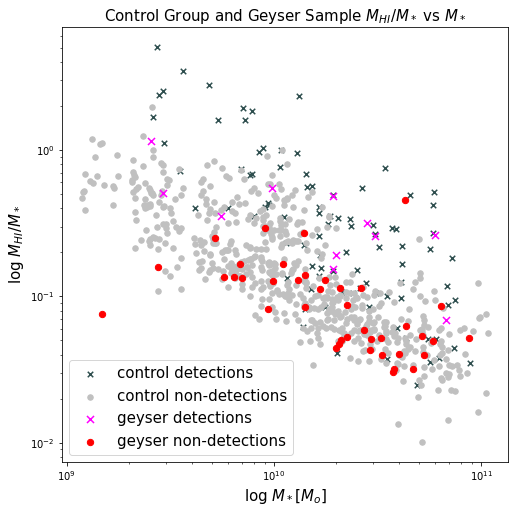

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
plt.scatter(xdetx, ydety, label='control detections', color='darkslategrey', marker='x',s=30)
plt.scatter(xnondetx, ynondety,label='control non-detections', color='silver', marker='o', s=30)
plt.scatter(detx,dety, label='geyser detections', color= 'fuchsia', marker='x', s=50)
plt.scatter(nondetx, nondety, label= 'geyser non-detections', color='red', marker='o', s=40)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log $M_* [M_o]$", fontsize=15)
plt.ylabel("log $M_{HI}/M_*$",fontsize=15)
plt.legend(loc='lower left', fontsize=15)
plt.savefig('all_mass_plot.png', bbox_inches='tight')
plt.title("Control Group and Geyser Sample $M_{HI}/M_*$ vs $M_*$", fontsize=15)

In [99]:
#combine red geyser table (data) with control sample table (controlll-take-22.fits)
file2='all-finall.fits'

hdul8 = fits.open(file2)
hdul8.info()

hdu8 = hdul8[1]
hdr08 = hdul8[0].header 
hdr8 = hdul8[1].header
alldata = hdu8.data

Filename: all-finall.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (2509,)   uint8   
  1  Joined        1 BinTableHDU     51   750R x 18C   [D, 11A, 9A, D, D, D, D, D, D, D, D, D, D, E, E, E, E, E]   


In [111]:
#make column for detection
hip = np.array(alldata['LOGMHI'])
sel = (alldata['LOGMHI'] > -999) 
sel = np.multiply(sel, 1)
print(sel)
#import sys
#np.set_printoptions(threshold=sys.maxsize)
#print(sel)
#print(alldata['LOGMHI'])

[0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [113]:
#make column for sample
bet=alldata['NUV_r']
bet[np.isnan(bet)] = 0
sel2 = bet > 0
sel2 = np.multiply(sel2, 1)

#where_are_NaNs = isnan(alldata['NUV_r'])
#alldata['NUV_r'][where_are_NaNs] = 0
bet[np.isnan(bet)] = 0
print(sel2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [114]:
#make new column for MHI/M* take two
ratio = np.zeros(len(alldata))
nondetections = alldata['LOGHILIM200KMS'] > -999
detections = (nondetections == False)
ratio[nondetections] = (10**alldata['LOGHILIM200KMS'][nondetections])/(alldata['nsa_elpetro_mass'][nondetections])
ratio[detections] = (10**alldata['LOGMHI'][detections])/(alldata['nsa_elpetro_mass'][detections])
print(len(ratio))

750


In [115]:
#table for Dave M*, MHI/M*, detection (1=True, 0=False), and sample (1=red geyser, 0=control)

tebl=Table()
tebl['MANGAID'] = alldata['MANGAID_1']
tebl['M*'] = alldata['nsa_elpetro_mass']
tebl['MHI/M*'] = ratio
tebl['Detection (0=non)'] = sel
tebl['Sample (0=red geyser)'] = sel2
tebl.remove_row(195)
tebl.show_in_notebook()

idx,MANGAID,M*,MHI/M*,Detection (0=non),Sample (0=red geyser)
0,1-48201,11365900000.0,0.06791408546617514,0,1
1,1-412043,13972200000.0,0.38833072071685204,0,1
2,1-80331,14134500000.0,0.09071344469206552,0,1
3,1-77704,16839700000.0,0.15619449372613525,1,1
4,1-78766,14106200000.0,0.13654687782677122,0,1
5,1-178473,14343200000.0,0.20670782754197112,0,1
6,1-180163,16471500000.0,0.36852514464377867,1,1
7,1-25609,11421100000.0,0.10064743185857755,0,1
8,1-24099,11786000000.0,0.1116388067198371,0,1
9,1-23891,16499700000.0,0.13858152572471014,1,1


In [116]:
tebl.write('stattable2.fits', format='fits')